# **Projeto: Análise Avançada e Predição de Aves Brasileiras**

## **Equipe**
- **Fábio Mendonça** - Mat. 01575972  
- **Luiz Francisco** - Mat. 01599063  
- **Daniel dos Anjos** - Mat. 01662119  
- **Gabriyella Salvador** - Mat. 01625010  

## **Área do Projeto**
**Biologia e Conservação Ambiental**

## **Tema**
**Diversidade, Conservação e Predição de Aves Brasileiras**

## **Objetivos**
1. **Análise Descritiva**: Entender a diversidade de aves por bioma, status de conservação e características gerais.  
2. **Modelagem Avançada**: Utilizar modelos de machine learning para predizer o status de conservação com base nas características das aves.  
3. **Insights**: Identificar fatores que influenciam a conservação, fornecendo suporte para políticas públicas ambientais.


Aqui vamos estruturar a configuraçao do ambiente

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuração de estilo global
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Base de Dados

Utilizaremos dados fictícios para a análise inicial, podendo ser substituídos por dados reais extraídos de fontes como WikiAves, ICMBio ou eBird.

Estrutura dos dados:

Nome científico e popular

Família

Bioma

Status de conservação

Hábitos alimentares


Exemplo de formato CSV:

nome_cientifico,nome_popular,familia,bioma,status_conservacao,habito_alimentar
Turdus_rufiventris,Sabiá-laranjeira,Turdidae,Mata Atlântica,LC,Frugívoro
Amazona_aestiva,Papagaio-verdadeiro,Psittacidae,Cerrado,NT,Herbívoro

Objetivos

1. Explorar a diversidade de espécies de aves brasileiras por bioma.


2. Analisar o status de conservação das espécies.


3. Visualizar geograficamente a distribuição de espécies por biomas.

In [ ]:
# Upload do arquivo com dados
from google.colab import files
uploaded = files.upload()

# Ler o arquivo CSV
df = pd.read_csv("aves_brasileiras.csv")

# Exibir uma amostra dos dados
df.head()

Saving aves_brasileiras.csv to aves_brasileiras (1).csv


,nome_comum,bioma,habito_alimentar,status_conservacao,envergadura_asa_cm,peso_kg,habitat,localizacao_geografica,periodo_atividade
0,Arara Azul,Cerrado,Frugívoro,Vulnerável,120,1.20,Cavernas e árvores altas,Amazônia,Diurno
1,Tucano Toco,Amazônia,Frugívoro,Pouco Preocupante,50,0.70,Florestas tropicais,Amazônia,Diurno
2,Curió,Mata Atlântica,Granívoro,Pouco Preocupante,20,0.02,Áreas de cerrado e matas,Mata Atlântica,Diurno
3,Papagaio Verdadeiro,Pantanal,Frugívoro,Pouco Preocupante,40,0.40,Áreas arborizadas,Pantanal,Diurno
4,Gavião Real,Amazônia,Carnívoro,Em Perigo,200,6.50,Florestas densas,Amazônia,Diurno


In [ ]:
# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

# Preencher valores ausentes com "Desconhecido" ou média (caso aplicável)
df.fillna("Desconhecido", inplace=True)

# Codificar colunas categóricas para valores numéricos
label_enc = LabelEncoder()
categorical_columns = ['bioma', 'habito_alimentar', 'status_conservacao']
for col in categorical_columns:
    df[col] = label_enc.fit_transform(df[col])

# Verificar o dataset após o tratamento
df.info()

Dados ausentes por coluna:
nome_comum                0
bioma                     0
habito_alimentar          0
status_conservacao        0
envergadura_asa_cm        0
peso_kg                   0
habitat                   1
localizacao_geografica    1
periodo_atividade         1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nome_comum              52 non-null     object 
 1   bioma                   52 non-null     int64  
 2   habito_alimentar        52 non-null     int64  
 3   status_conservacao      52 non-null     int64  
 4   envergadura_asa_cm      52 non-null     int64  
 5   peso_kg                 52 non-null     float64
 6   habitat                 52 non-null     object 
 7   localizacao_geografica  52 non-null     object 
 8   periodo_atividade       52 non-null     object 
dtypes: float64(1), int

In [ ]:
# Resumo estatístico
print("Resumo Estatístico:")
print(df.describe())

# Distribuição de espécies por bioma
print("\nDistribuição por Bioma:")
print(df['bioma'].value_counts())

Resumo Estatístico:
           bioma  habito_alimentar  status_conservacao  envergadura_asa_cm  \
count  52.000000         52.000000           52.000000           52.000000   
mean    1.346154          2.057692            0.980769           79.807692   
std     1.186271          1.775801            0.851536           62.334656   
min     0.000000          0.000000            0.000000           12.000000   
25%     0.000000          1.000000            0.000000           30.000000   
50%     1.000000          1.500000            1.000000           50.000000   
75%     2.250000          3.000000            1.000000          122.500000   
max     3.000000          5.000000            3.000000          210.000000   

         peso_kg  
count  52.000000  
mean    1.774038  
std     2.181553  
min     0.010000  
25%     0.115000  
50%     0.600000  
75%     3.025000  
max     8.000000  

Distribuição por Bioma:
bioma
0    17
1    13
3    13
2     9
Name: count, dtype: int64


<ipython-input-8-7f60a489bafe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='bioma', palette="viridis", order=df['bioma'].value_counts().index)


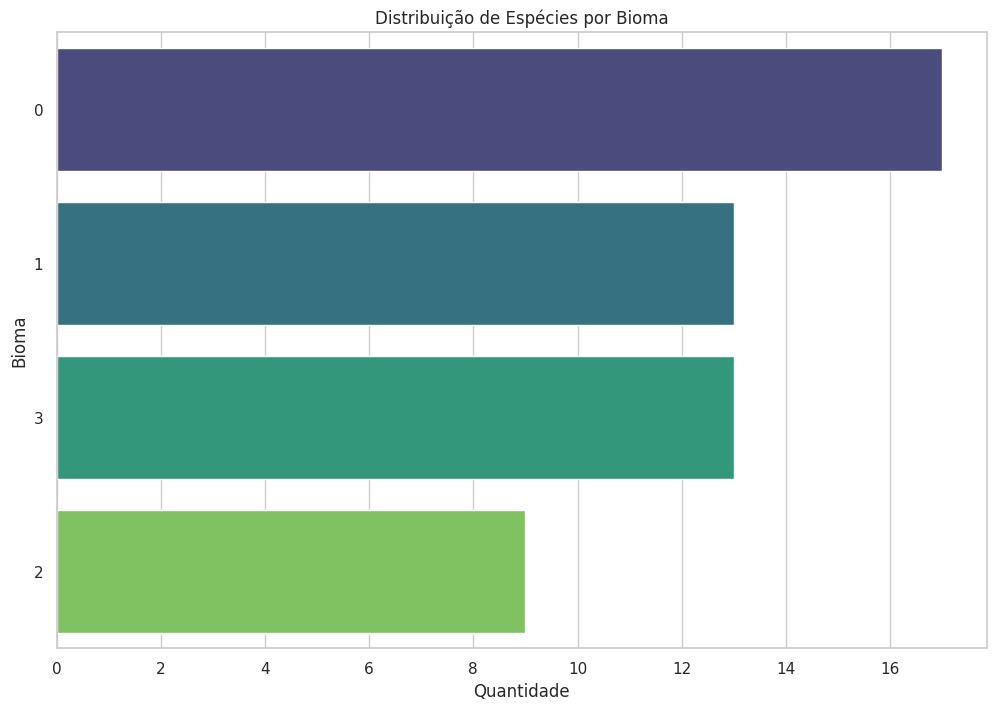

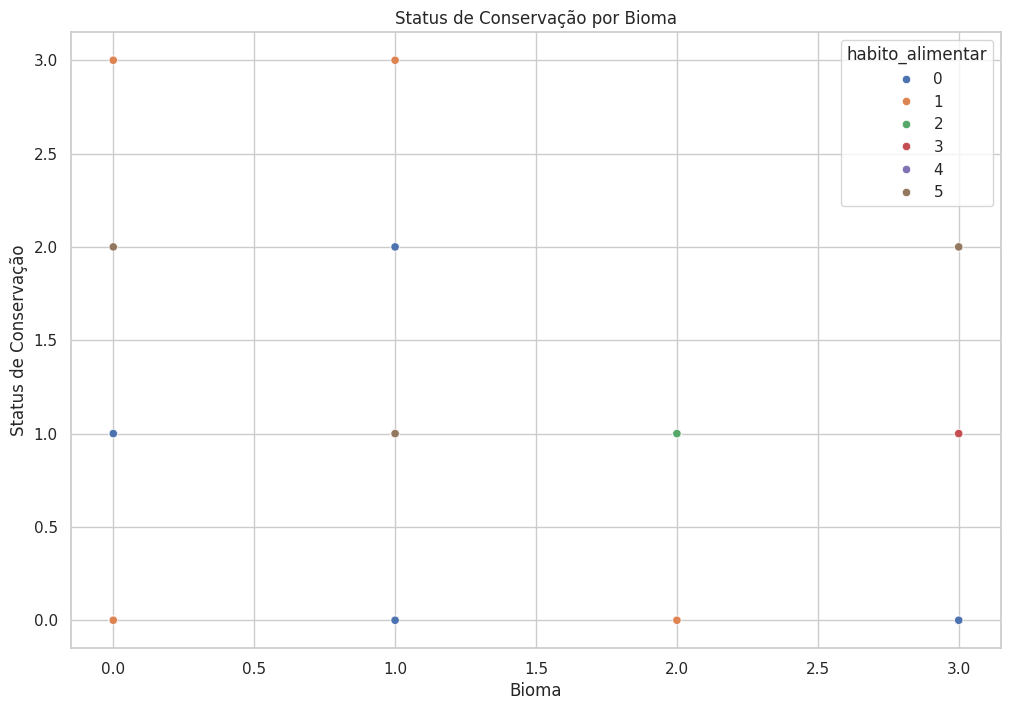

In [ ]:
# Gráfico de barras: Espécies por bioma
sns.countplot(data=df, y='bioma', palette="viridis", order=df['bioma'].value_counts().index)
plt.title("Distribuição de Espécies por Bioma")
plt.xlabel("Quantidade")
plt.ylabel("Bioma")
plt.show()

# Gráfico de dispersão: Status de conservação por bioma
sns.scatterplot(data=df, x='bioma', y='status_conservacao', hue='habito_alimentar', palette="deep")
plt.title("Status de Conservação por Bioma")
plt.xlabel("Bioma")
plt.ylabel("Status de Conservação")
plt.show()

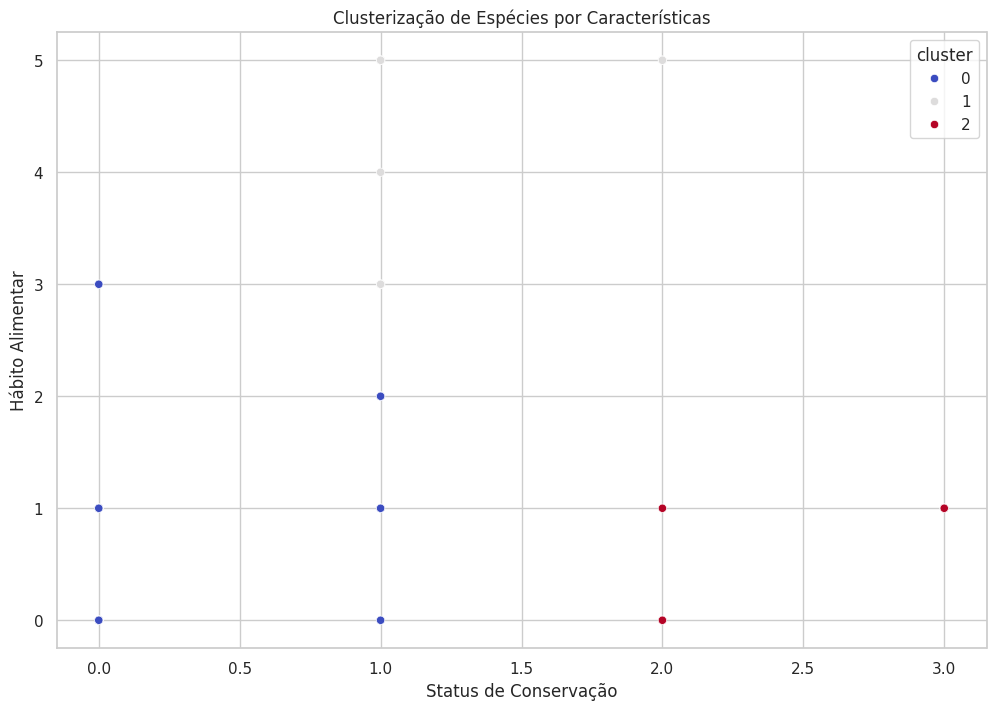

In [ ]:
# Seleção de variáveis para clusterização
cluster_data = df[['status_conservacao', 'habito_alimentar']]

# Escalonar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualização dos clusters
sns.scatterplot(data=df, x='status_conservacao', y='habito_alimentar', hue='cluster', palette="coolwarm")
plt.title("Clusterização de Espécies por Características")
plt.xlabel("Status de Conservação")
plt.ylabel("Hábito Alimentar")
plt.show()

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         6
           2       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.89      0.61      0.66        11
weighted avg       0.82      0.73      0.69        11



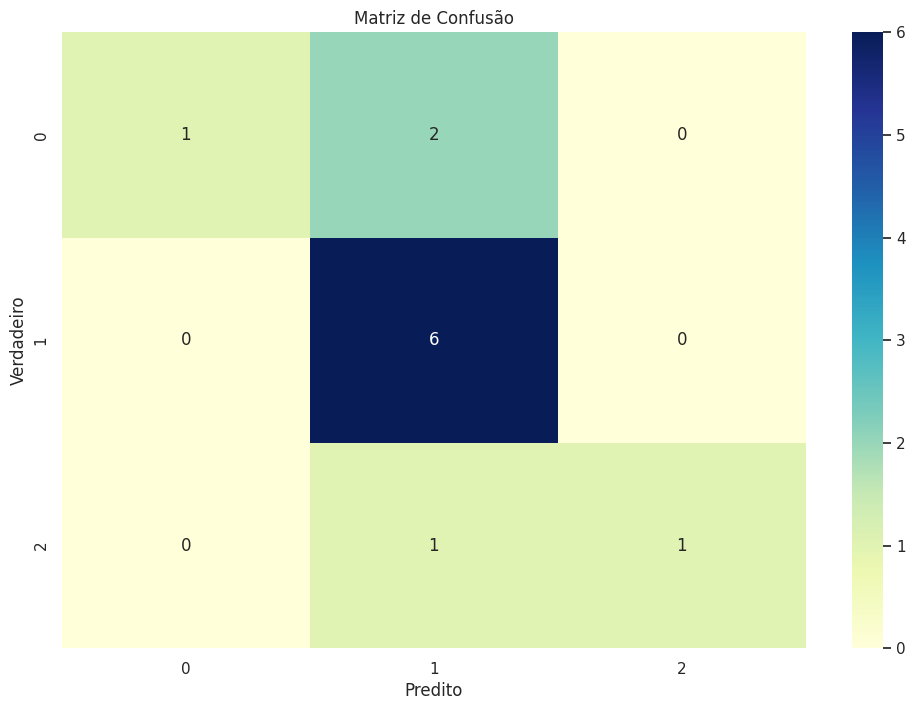

In [ ]:
# Seleção de variáveis independentes e dependente
X = df[['bioma', 'habito_alimentar', 'cluster']]
y = df['status_conservacao']

# Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = rf_model.predict(X_test)

# Exibir relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

Resultados Esperados

Identificação da diversidade de aves brasileiras.

Visualização clara da distribuição geográfica e status de conservação.

Sugestões para ações de preservação e conscientização ambiental.